In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv(r'C:\Users\manav\Desktop\AQI Prediction\dataset\Final_aqi_weather.csv')
from sklearn.model_selection import train_test_split
X=df[['AQI','PM2.5','PM10','NO2','SO2','CO','O3','temperature_2m','relative_humidity_2m','wind_speed_10m']]
y=df[['Next_Day_AQI']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

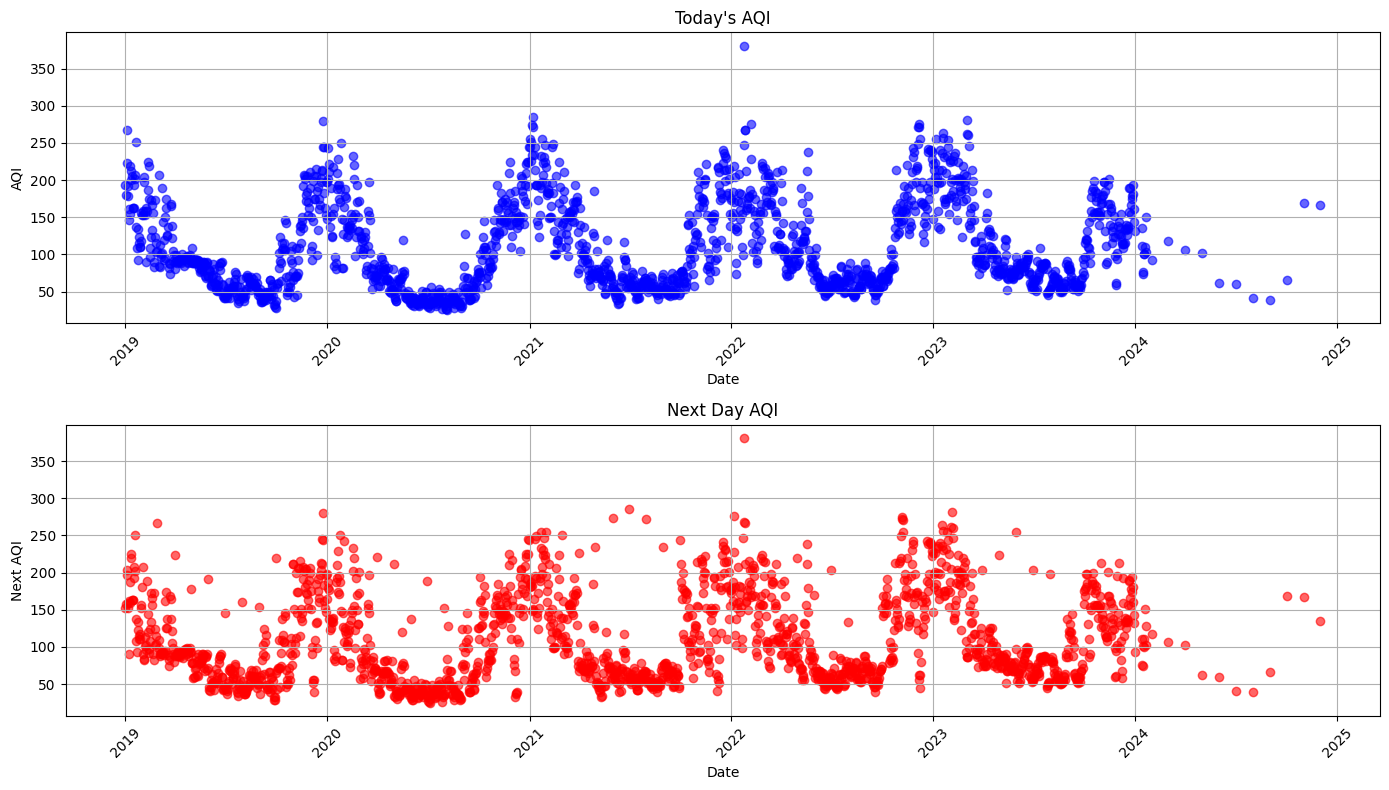

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Make sure date is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Set up 2 plots vertically
plt.figure(figsize=(14, 8))

# Plot 1: Today's AQI
plt.subplot(2, 1, 1)
plt.scatter(df['date'], df['AQI'], color='blue', alpha=0.6)
plt.title("Today's AQI")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.xticks(rotation=45)
plt.grid(True)

# Plot 2: Next Day's AQI
plt.subplot(2, 1, 2)
plt.scatter(df['date'], df['Next_Day_AQI'], color='red', alpha=0.6)
plt.title("Next Day AQI")
plt.xlabel("Date")
plt.ylabel("Next AQI")
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()


In [4]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# ✅ Base model
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# ✅ Parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5],
    'reg_alpha': [0, 0.1, 1],  # L1
    'reg_lambda': [1, 1.5, 2],  # L2
}

# ✅ RandomizedSearchCV setup
search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=50,               # More = better tuning
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# ✅ Fit the model
search.fit(X_train, y_train)

# ✅ Best model
best_xgb = search.best_estimator_

# ✅ Predict
pred = best_xgb.predict(X_test)

# ✅ Evaluate
print("MAE  : ", mean_absolute_error(y_test, pred))
print("MSE  : ", mean_squared_error(y_test, pred))
print("RMSE : ", np.sqrt(mean_squared_error(y_test, pred)))
print("R²   : ", r2_score(y_test, pred))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
MAE  :  28.451879501342773
MSE  :  1621.620361328125
RMSE :  40.2693476645466
R²   :  0.5595706701278687


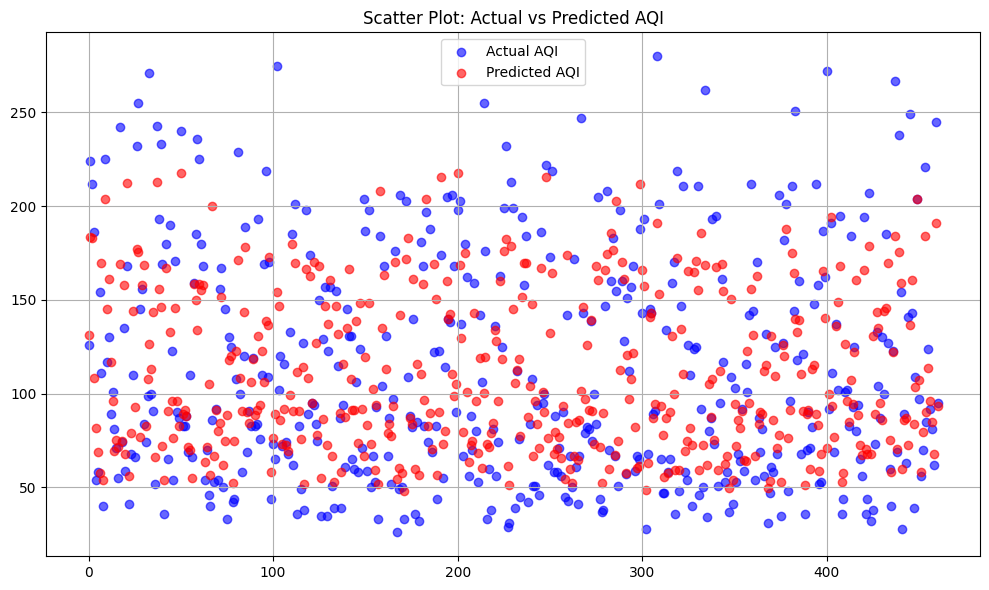

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', alpha=0.6, label='Actual AQI')
plt.scatter(range(len(pred)), pred, color='red', alpha=0.6, label='Predicted AQI')
plt.title("Scatter Plot: Actual vs Predicted AQI")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
import joblib
import os

# Step 1: Go to the root dir (one level up from /notebooks/)
root_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
model_dir = os.path.join(root_dir, 'models')

# Step 2: Ensure models folder exists
os.makedirs(model_dir, exist_ok=True)

# Step 3: Save the model
model_path = os.path.join(model_dir, 'aqi_model.joblib')
joblib.dump(best_xgb, model_path)

print(f"✅ Model saved to: {model_path}")


✅ Model saved to: c:\Users\manav\Desktop\AQI Prediction\models\aqi_model.joblib
